# 0. INFORMAÇÕES DO GRUPO
---

Nomes e Números USP:

- Adriane Akemi Yamaguti - NUSP: 11915623
- Aimê Gomes da Nobrega  - NUSP: 11882429
- Ariel Bor Cheng Chen   - NUSP: 11877260
- Emerson Hideki Miady   - NUSP: 11207943
- Rafael Fragoso Marin   - NUSP: 11809318

# 1.0. Contexto

Este conjunto de dados clássico contém os preços e outros atributos de quase 54.000 diamantes.

O nosso objetivo é tentar prever os preços ideais para a venda dos diamantes, de acordo com algumas variáveis que irão ser descritas na seção 3.

Base de dados (Kaggle): clique [aqui](https://www.kaggle.com/datasets/shivam2503/diamonds).

# 2.0. IMPORTAÇÕES
---

## 2.1. Bibliotecas

In [3]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
# from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score


from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


## 2.2. Dados

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/aime-n/lasso-aprendizado/main/trab/data/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
# Retirando a primeira coluna (index)
df = df.iloc[:, 1:]
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 2.3. Funções

In [6]:
def print_is_duplicated(df):
    """
    Função que verifica se os dados estão duplicados. Se sim,
    mostra a quantidade de dados duplicados.
    """
    confirmation = df.duplicated().values.any()
    print(f"Existem valores duplicados? {confirmation}")
    if confirmation == True:
        print(f"Existem no total {df.duplicated().sum()} linhas duplicadas.")
    else:
        print('Não existem linhas duplicadas.')
        
def add_model_on_metrics_df(metrics_df, model, model_name):
    '''
    Adiciona linha com modelo e métricas de avaliação: rEQM e R2.
    '''
    model_rmse = np.mean(-cross_val_score(model, X_train, y_train, cv=10,
                                          scoring='neg_root_mean_squared_error'))
    
    model_r2 = np.mean(cross_val_score(model, X_train, y_train, cv=10,
                                       scoring='r2'))
    
    model_line = pd.Series([model_name, model_rmse, model_r2], index=metrics_df.columns)
    
    metrics_df = metrics_df.append(model_line, ignore_index=True)
    
    return metrics_df

# 3.0. DESCRIÇÃO DOS DADOS
---

## 3.1. Descrição das variáveis

As descrições abaixo foram todas obtidas no site do dataset (Kaggle):

- ``price``: preço em dólares ($\$$326 até $\$$18,823).

- ``carat``: peso em quilate do diamante (0.2 até 5.01).*

- ``cut``: qualidade do corte na ordem crescente: *Fair*, *Good*, *Very Good*, *Premium* e *Ideal*

- ``color``: cor do diamante, do D (melhor) até o J (pior).

- ``clarity``: uma medida de quão claro o diamante é. Seguindo a ordem a seguir, vai do pior até o melhor: (I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF).

- ``x``: comprimento em mm (0 até 10.74).

- ``y``: largura em mm (0 até 58.9).

- ``z``: espessura em mm (0 até 31.8).

- ``depth``: Porcentagem da espessura = $\frac{z}{\frac{(x+y)}{2}}$ (43--79).

- ``table``: largura do topo do diamante em relação ao ponto mais largo (43--95).

## 3.2. Tipos das variáveis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Os tipos das variáveis estão de acordo com as características delas.

## 3.3. Verificação de valores nulos

In [8]:
# Soma de valores nulos por coluna
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Não existem valores nulos neste dataset, portanto nenhuma manipulação dos dados será necessária.

## 3.4. Valores duplicados

In [9]:
# Verifica se existem valores duplicados
print_is_duplicated(df)

Existem valores duplicados? True
Existem no total 146 linhas duplicadas.


In [10]:
# Porcentagem dos valores duplicados
duplicated_pct = round(df.duplicated().sum() / len(df) * 100, 2)
print(f"Existem {duplicated_pct}% linhas duplicadas neste dataset.")

Existem 0.27% linhas duplicadas neste dataset.


Como existem 0.27% linhas duplicadas no nosso conjunto, vamos excluí-las na seção 4.

## 3.5. Outliers

In [11]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Observamos um desvio padrão muito alto na variável ``price``, sendo até maior que a própria média. Vamos verificar o boxplot com esses valores.

Resolvemos não retirar os outliers, pois os preços dos diamantes podem acabar variando muito, dependendo das outras características. Então assumimos que é são valores muito acima do esperado mas que são condizente com a realidade.

# 4.0. MANIPULAÇÃO DOS DADOS
---

## 4.1. Remoção dos valores duplicados

Conforme na seção 3.4, verificamos que existiam 146 linhas duplicadas, e desta forma, resolvemos removê-las.

In [12]:
# Remove as linhas duplicadas
df = df.drop_duplicates()

print(f"Este dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")
df.head()

Este dataset possui 53794 linhas e 10 colunas.


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# 5.0. ANÁLISE EXPLORATÓRIA DOS DADOS
---

## 5.1. Análise de uma variável

### 5.1.1. Variável Resposta

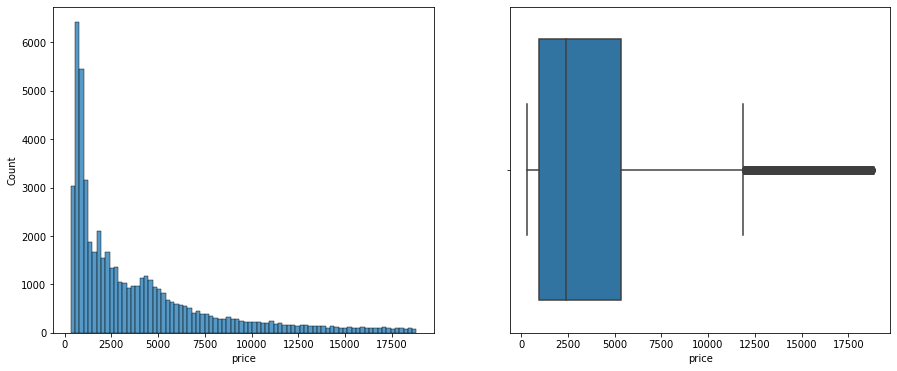

In [11]:
fig=plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax=sns.histplot(x='price', data=df,palette="viridis")
plt.subplot(1,2,2)
ax=sns.boxplot(x='price', data=df)
plt.show()

Verificamos a existencia de calda longa à direita e de muitos outliers.

## 5.1.2. Variáveis Categóricas

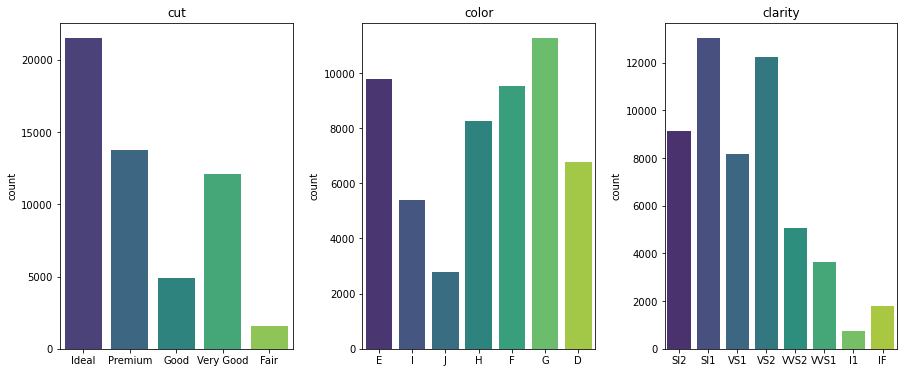

In [12]:
cate=['cut','color','clarity']
fig=plt.figure(figsize=(15,6))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(1, 4):
    plt.subplot(1, 3, i)
    ax = sns.countplot(x=cate[i-1], data=df, palette="viridis", 
                       #order=np.unique(data[infos[i-1]].values).tolist()
                       )
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.title(cate[i-1])
plt.show()

* Nosso conjunto de dados contém muitas observações com o corte "ideal".
* Os dados estão bem desbalanceados para cada categoria de cada variável.



## 5.1.3. Variáveis Quantitativas

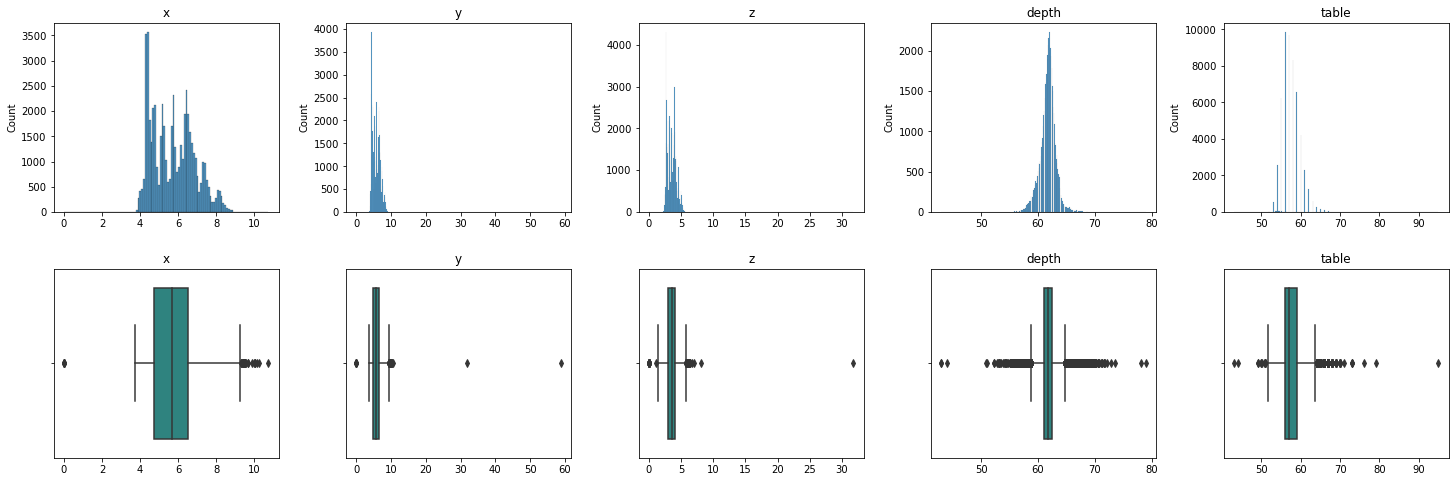

In [13]:
quant=['x','y','z','depth','table']
fig=plt.figure(figsize=(25,8))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(1, 6):
    plt.subplot(2, 5, i)
    ax = sns.histplot(x=quant[i-1], data=df, palette="viridis", 
                       #order=np.unique(data[infos[i-1]].values).tolist()
                       )
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.title(quant[i-1])

for i in range(1, 6):
    plt.subplot(2, 5, i+5)
    ax = sns.boxplot(x=quant[i-1], data=df, palette="viridis", 
                       #order=np.unique(data[infos[i-1]].values).tolist()
                       )
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.title(quant[i-1])
plt.show()

* Para a variável "depth", temos uma distribuição muito simétrica, lembrando uma distribuição normal 
* Existem outliers em todas as variáveis quantitativas. Apesar disso, resolvemos não descartá-los porque, em nosso contexto de negócio, isso pode ser normal.

## 5.2. Análise de duas variáveis

### 5.2.1. Variáveis Categóricas x price

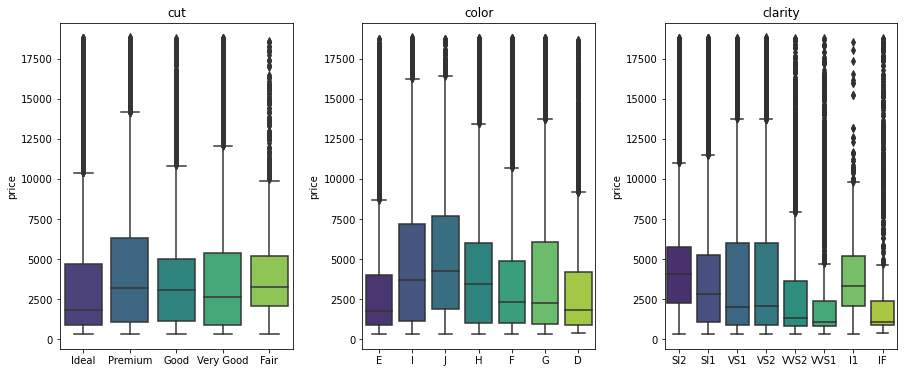

In [14]:
cate=['cut','color','clarity']
fig=plt.figure(figsize=(15,6))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(1, 4):
    plt.subplot(1, 3, i)
    ax = sns.boxplot(y='price',x=cate[i-1], data=df, palette="viridis", 
                       #order=np.unique(data[infos[i-1]].values).tolist()
                       )
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.title(cate[i-1])
plt.show()

* Há presença de muitos outliers nos 3 gráficos.
* No segundo  gráfico, apesar da cor "J" possuir uma classificação baixa, sua mediana é a maior entre os todas as cores. Além disso, a caixa de "J" está mais acima em relação às outras, indicando uma maior faixa de preços.
* Por fim, a classificação "IF" é a maior em limpidez, porém ela possui uma das menores medianas.

### 5.2.2. Variáveis Numéricas x price

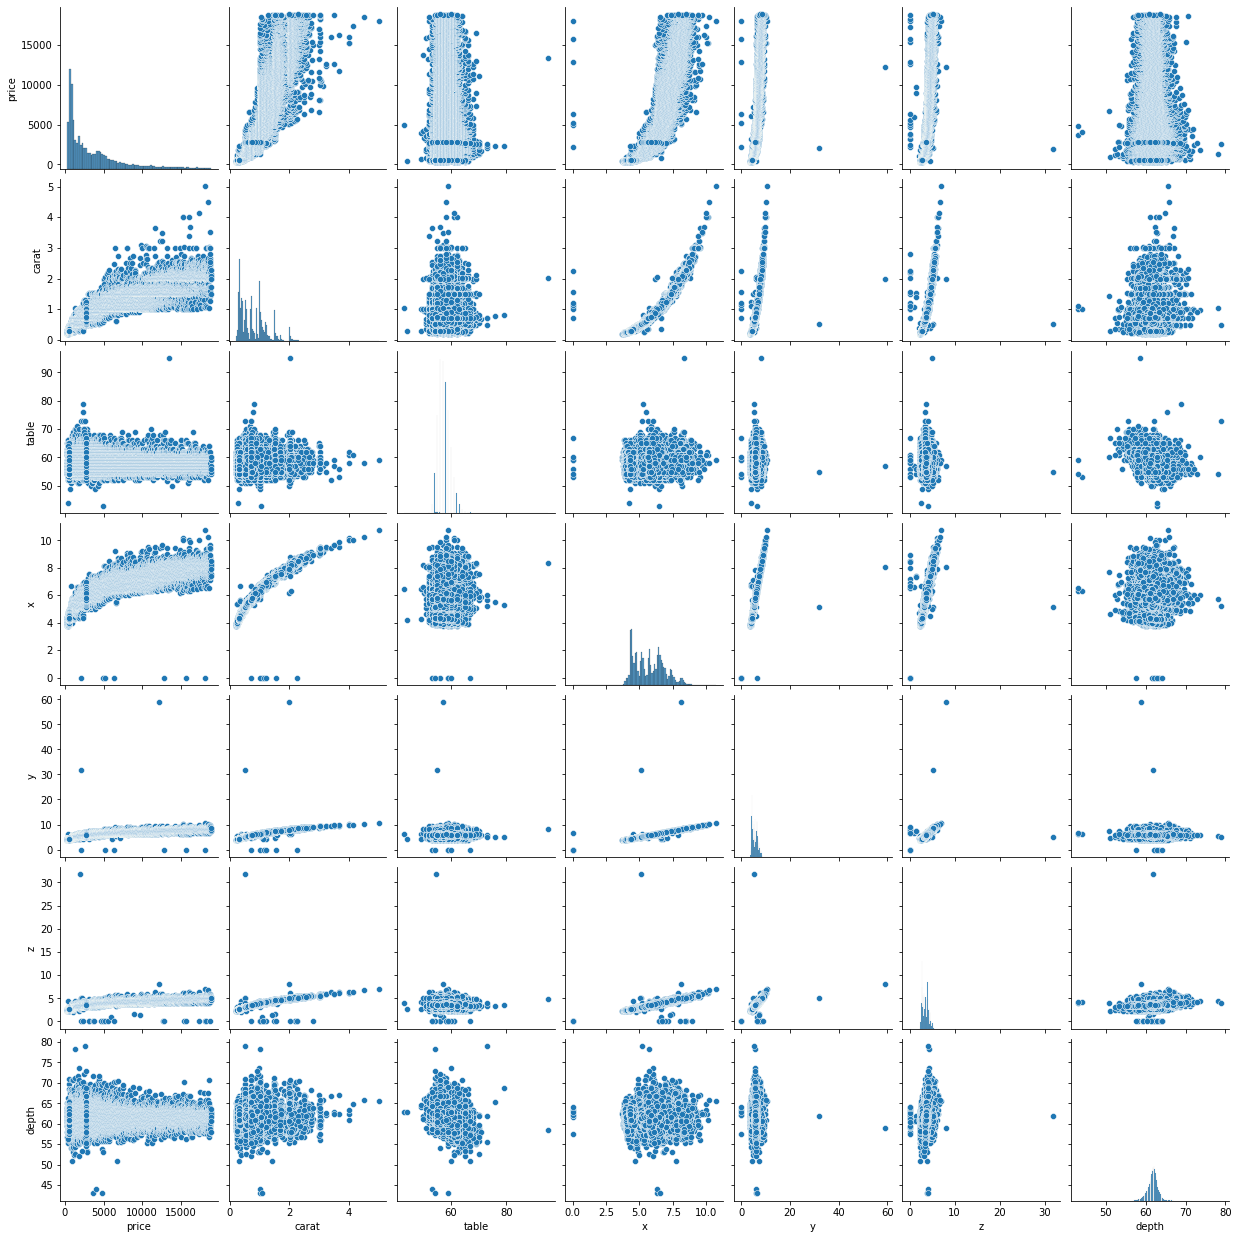

In [15]:
sns.pairplot(df[['price', 'carat', 'table', 'x', 'y', 'z', 'depth']],palette="viridis");

Mapa de correlações:

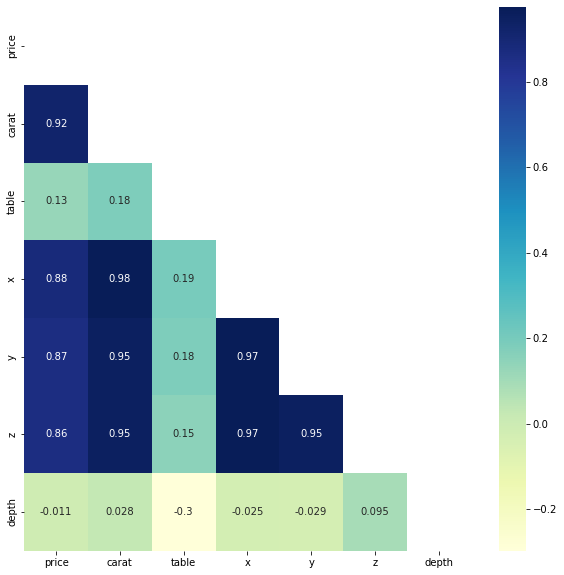

In [16]:
# Mapa de correlações
plt.figure(figsize=(10,10))
corr = df[['price', 'carat', 'table', 'x', 'y', 'z', 'depth']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, cmap="YlGnBu", annot=True);


Note que "x", "y" e "z" estão fortemente correlacionadas com a variável "carat". Dessa forma, resolvemos removê-las do modelo, uma vez que "carat" já explica essas três variáveis e menos variáveis deixa o modelo mais simples.

# 6.0. PRÉ-PROCESSAMENTO DOS DADOS
---

In [13]:
#Cópia do dataframe
df6 = df.copy()

## 6.1. Encoding

O processo de enconding transforma as variáveis categóricas oridinais em numéricas para facilitar a modelagem.

Na transformação, convencionamos que quanto maior o valor numérico, maior nível categórico, de forma proporcional. 





In [14]:
# Definição das variáveis numéricas e categóricas

var_num = ['carat','depth', 'table']
var_cat = ['cut', 'color', 'clarity']

# Ordenação das variáveis
df6 = df6[['carat', 'depth', 'table', 'cut', 'color', 'clarity', 'price']]

# Dicionário para encoding
cut = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
color = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
clarity = {'I1':1,  'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

# Encoding das variáveis categóricas
df6['cut'] = df6['cut'].replace(cut)
df6['color'] = df6['color'].replace(color)
df6['clarity'] = df6['clarity'].replace(clarity)

In [15]:
df6.head()

,carat,depth,table,cut,color,clarity,price
0,0.23,61.5,55.0,5,6,2,326
1,0.21,59.8,61.0,4,6,3,326
2,0.23,56.9,65.0,2,6,5,327
3,0.29,62.4,58.0,4,2,4,334
4,0.31,63.3,58.0,2,1,2,335


## 6.2. Divisão dos dados em Treino e Teste

Dividimos o dataframe que será utilizado nos métodos de regressão analisados em 80% para treino e 20% para teste.

In [16]:
# Variável dependente e independentes
X = df6.drop('price', axis=1).values

y = df6['price'].values

In [17]:
# 80% para treino, e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6.3. Rescaling

Utilizamos a técnica de Robust Scaler para a padronização dos dados pois o conjunto de dados contém outliers, e esse método utiliza os quantis para a padronização, lidando melhor do que a técnica de Standard Scaler e MinMax Scaler nessa situação.

In [18]:
# Definindo o robust scaler
rs = RobustScaler()

# Transformando as colunas
X_train[:, :5] = rs.fit_transform(X_train[:, :5])
X_test[:, :5] = rs.transform(X_test[:, :5])

# 7.0. Aplicação dos modelos
---

## 7.1. MMQ

In [23]:
# Modelo MMQ

# %%timeit -n 100
model = LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

mmq_coef=model.coef_

In [24]:
# MMQ (EQM)
ols_mse = mean_squared_error(y_pred, y_test)
ols_rmse = np.sqrt(ols_mse)
ols_score = model.score(X_test, y_test)

# MMQ (R2)
ols_r2 = r2_score(y_test, y_pred)

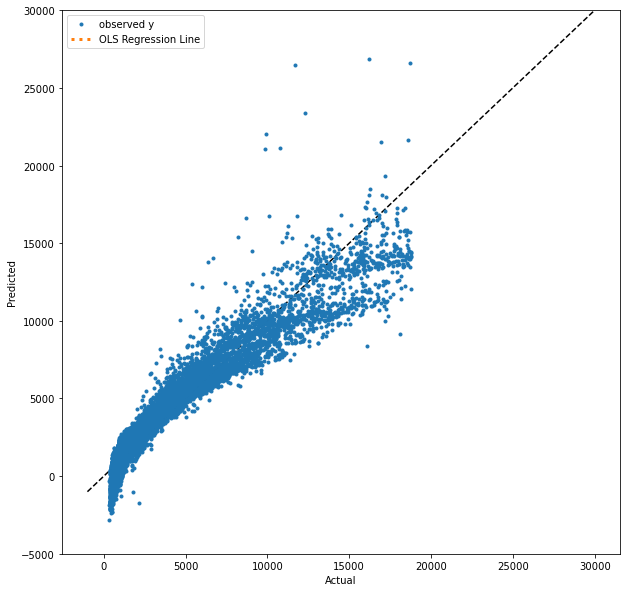


Modelo	EQM		rEMQ		R2	  Tempo Médio (100 loops)
MMQ	1448793.8745	1203.65854	0.90495	  27.4


In [25]:
plt.figure(figsize=(10,10))
# ax=sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
# x_lim = plt.xlim()
# y_lim = plt.ylim()
plt.plot([-1000,30000], [-1000,30000], "k--") # 45 graus

plt.plot(y_test, y_pred, '.', label='observed y');
# plt.plot(x, a * x + b, 'r', label='true y', lw=3, alpha=0.4);
plt.plot(y_test, model.coef_[0] * y_test + model.intercept_ , label='OLS Regression Line', c='C1', ls='dotted', lw=3, )
plt.legend();

plt.ylim([-5000, 30000])

plt.show()

print('')
print('Modelo\tEQM\t\trEMQ\t\tR2\t  Tempo Médio (100 loops)')
print(f'MMQ\t{round(ols_mse,4)}\t{round(ols_rmse,5)}\t{round(ols_r2,5)}\t  27.4')

Nesse gráfico, podemos notar que o modelo consegue prever relativamente bem, uma vez que o ideal é que os pontos fiquem próximos da reta de 45º.

Caso os pontos fiquem acima desta reta, o nosso modelo está superestimando os valores reais; caso fiquem abaixo, estará subestimando os valores reais.

## 7.2. Ridge

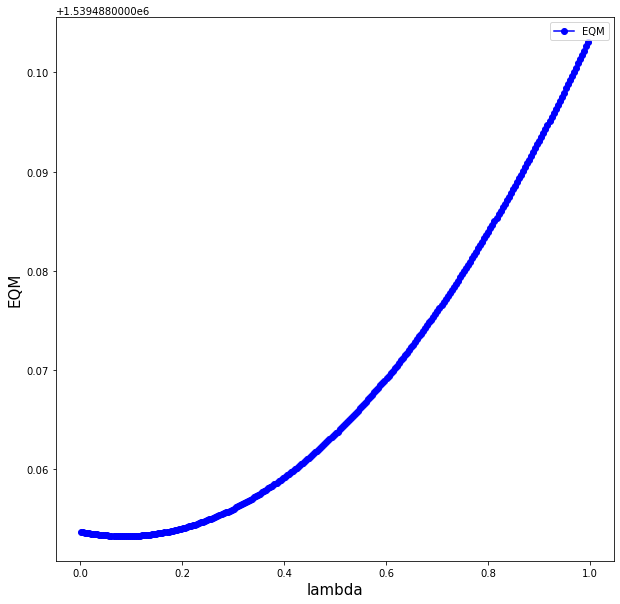


Melhor Lambda: 0.085


In [26]:
# Encontrando o melhor lambda/alpha para o modelo Rigde

cv = KFold(n_splits=10, shuffle=True, random_state=1)

macc = []
va = []

for i in range(1,1001,4):
  a = i/1000
  vacc = []

  for train_index, test_index in cv.split(X_train, y_train):

      X2_train, X2_test = X_train[train_index], X_train[test_index]
      y2_train, y2_test = y_train[train_index], y_train[test_index]

      model = Ridge(alpha=a)
      model.fit(X2_train,y2_train)
      y_pred = model.predict(X2_test) 
      score = mean_squared_error(y_pred, y2_test)

      vacc.append(score)

  macc.append(np.mean(vacc))
  va.append(a)
  # print('alpha:', a, end=' | ')
  # print('Average accuracy:', np.mean(vacc), end=' | ')
best_alpha = range(1,1001,4)[np.argmin(macc)]/1000

plt.figure(figsize=(10,10))
plt.plot(va, macc, '-bo', label = 'EQM')
plt.xlabel('lambda', fontsize = 15)
plt.ylabel('EQM', fontsize = 15)
plt.legend()
plt.show()
print()
print('Melhor Lambda:', best_alpha)

Para os modelos Ridge e Lasso, avaliamos os EQM para 1000 possíveis lambdas, divididos no intervalo (0,1], e calculamos o EQM para cada lambda, utilizando cross-validation com k=5 para reduzir a aleatoridade entre os folds.

No Ridge, encontramos que o melhor lambda é de 0.085, o qual aprasenta o menor EQM, e que será utilizado para encontrar os betas do modelo.

In [27]:
# Modelo Ridge

# %%timeit -n 100
model = Ridge(alpha=best_alpha)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

ridge_coef=model.coef_

In [28]:
#Ridge (EQM)
ridge_mse = mean_squared_error(y_pred, y_test)
ridge_rmse = np.sqrt(ridge_mse)
ridge_score = model.score(X_test, y_test)

#Ridge (R2)
ridge_r2 = r2_score(y_test, y_pred)

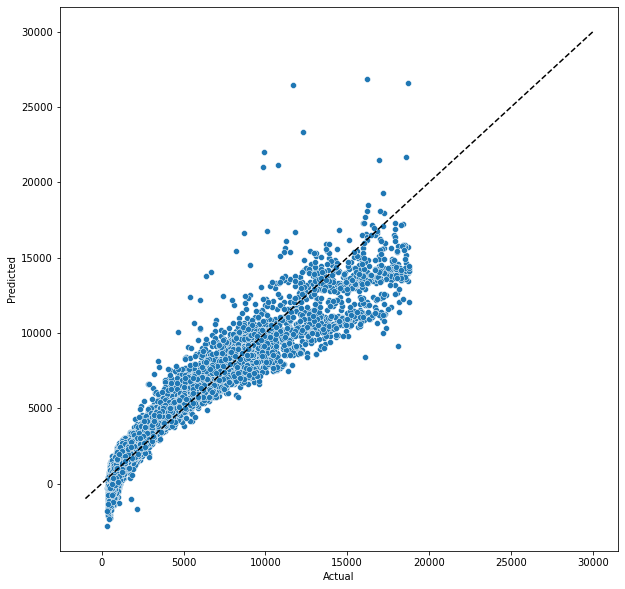


Modelo	EQM		rEMQ		R2	  Tempo Médio (100 loops)
Ridge	1448794.3726	1203.65874	0.90495	  11.3


In [29]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot([-1000,30000], [-1000,30000], "k--")
plt.show()

print('')
print('Modelo\tEQM\t\trEMQ\t\tR2\t  Tempo Médio (100 loops)')
print(f'Ridge\t{round(ridge_mse,4)}\t{round(ridge_rmse,5)}\t{round(ridge_r2,5)}\t  11.3')

## 7.3. Lasso

100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:18<00:00, 13.20it/s]


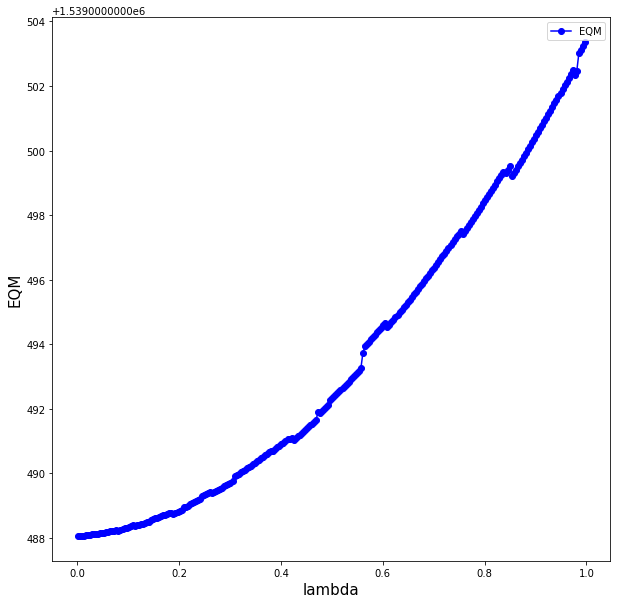


Melhor Lambda: 0.001


In [30]:
# Encontrando o melhor lambda/alpha para o modelo Lasso

cv = KFold(n_splits=10, shuffle=True, random_state=1)

macc = []
va = []

for i in tqdm(range(1,1001,4)):
  a = i/1000
  vacc = []

  for train_index, test_index in cv.split(X_train, y_train):

      X2_train, X2_test = X_train[train_index], X_train[test_index]
      y2_train, y2_test = y_train[train_index], y_train[test_index]

      model = Lasso(alpha=a)
      model.fit(X2_train,y2_train)
      y_pred = model.predict(X2_test) 
      score = mean_squared_error(y_pred, y2_test)

      vacc.append(score)

  macc.append(np.mean(vacc))
  va.append(a)
  # print('alpha:', a, end=' | ')
  # print('Average accuracy:', np.mean(vacc), end=' | ')
best_alpha = [i/1000 for i in range(1,201)][np.argmin(macc)]

plt.figure(figsize=(10,10))
plt.plot(va, macc, '-bo', label = 'EQM')
plt.xlabel('lambda', fontsize = 15)
plt.ylabel('EQM', fontsize = 15)
plt.legend()
plt.show()

print()
print('Melhor Lambda:', best_alpha)

No Lasso, encontramos que o melhor lambda é de 0.001, o qual aprasenta o menor EQM, e que será utilizado para encontrar os betas do modelo.

In [31]:
# Modelo Lasso

# %%timeit -n 100
model = Lasso(alpha=best_alpha)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

lasso_coef=model.coef_

In [32]:
# Lasso (EQM)
lasso_mse = mean_squared_error(y_pred, y_test)
lasso_rmse = np.sqrt(lasso_mse)
lasso_score = model.score(X_test, y_test)

# Lasso (R2)
lasso_r2 = r2_score(y_test, y_pred)

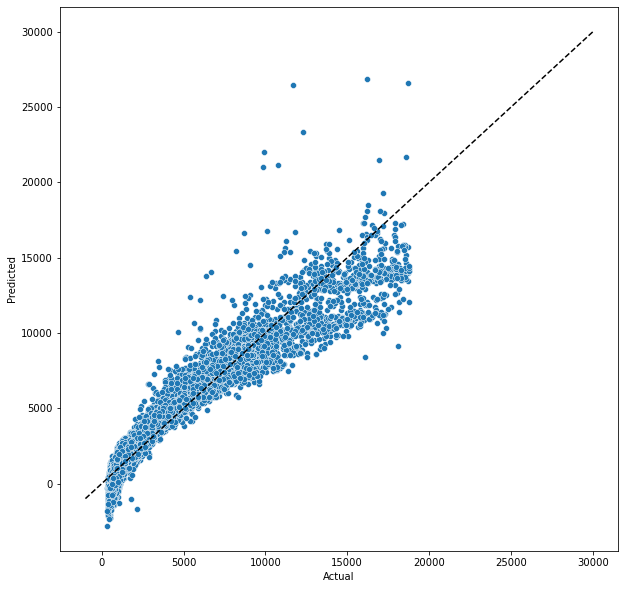


Modelo	EQM		rEMQ		R2	  Tempo Médio (100 loops)
Lasso	1448793.927	1203.65856	0.90495	  19.7


In [33]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot([-1000,30000], [-1000,30000], "k--")
plt.show()


print('')
print('Modelo\tEQM\t\trEMQ\t\tR2\t  Tempo Médio (100 loops)')
print(f'Lasso\t{round(lasso_mse,4)}\t{round(lasso_rmse,5)}\t{round(lasso_r2,5)}\t  19.7')

## 8.0. Resultados
---

In [34]:
coefs=pd.DataFrame({'Variável':df6.columns[:-1],
                    'MMQ':mmq_coef,
                    'Ridge':ridge_coef,
                    'Lasso':lasso_coef})
coefs

,Variável,MMQ,Ridge,Lasso
0,carat,5628.327397,5628.299200,5628.323415
1,depth,-68.529658,-68.529537,-68.528399
2,table,-75.584460,-75.581568,-75.582338
3,cut,246.287643,246.285802,246.285932
4,color,951.496820,951.480060,951.492363
5,clarity,523.008120,523.003431,523.007393


Note que o modelo Lasso não zerou nenhum parâmetro por conta do lambda baixo. Observe também que os parâmetros dos três modelos estão bem próximos, o que é esperado uma vez que os lambdas dos modelos Ridge e Lasso são próximos de zero. 


In [35]:
# Resultados

modelos = ['MMQ', 'Ridge', 'Lasso']
EQM = [round(i, 4) for i in [ols_mse, ridge_mse, lasso_mse]]
rEQM = [round(i, 5) for i in [ols_rmse, ridge_rmse, lasso_rmse]]
R2 = [round(i, 4) for i in [ols_r2, ridge_r2, lasso_r2]]
tempo = ['27.4 ms', '11.3 ms', '19.7 ms']

resultados = pd.DataFrame(data={
    'Modelos': modelos,
    'EQM': EQM,
    'rEQM': rEQM,
    'R2': R2,
    'Tempo Médio (100 loops)': tempo
})

pd.set_option('display.float_format', '{:.5f}'.format)
resultados

,Modelos,EQM,rEQM,R2,Tempo Médio (100 loops)
0,MMQ,1448793.87450,1203.65854,0.90490,27.4 ms
1,Ridge,1448794.37260,1203.65874,0.90490,11.3 ms
2,Lasso,1448793.92700,1203.65856,0.90490,19.7 ms


Comparando os resultados obtidos nos três modelos, percebemos que o rEQM são bem próximas e o R2 iguais, com isso, vamos analisar o tempo médio de execução dos modelos como critério para seleção do melhor modelo.

Portanto, considerando o poder computacional exigido, escolhemos o **Modelo Ridge** como nosso melhor modelo paramétrico para a predição dos preços de diamantes.

# 9.0. Testando Modelos Não-Paramétricos

Agora a idéia é testar modelos não-paramétricos, e ver se eles conseguem resultados melhores em relação ao Rdige (lambda = 0.085, o melhor possível, como descrito na seção 7.2).

Vamos treinar os seguintes modelos com os hiperparametros padrões das bibliotecas:

- Árvore de Decisão;
- Florestas Aleatórias;
- XGBoost.

Utilizando as seguintes técnicas para a avaliação desses algoritmos:

1. Cross-Validation, com k = 10;
2. Obtenção do **rEQM** e **R2**;
3. Como critério de desempate, o Tempo Médio em 100 loops de treinamento (Opcional).

In [19]:
# Definindo DataFrame final
metrics_df = pd.DataFrame(columns=['Modelo', 'rEQM', 'R2'])

# Definição dos modelos
ridge = Ridge(alpha=0.085, random_state=1)
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb_reg = xgb.XGBRegressor(random_state=1)

In [20]:
# Treinamento dos dados com o Cross-Validation para cada modelo
metrics_df = add_model_on_metrics_df(metrics_df, ridge, 'Ridge')
metrics_df = add_model_on_metrics_df(metrics_df, dt, 'Árvore de Decisão')
metrics_df = add_model_on_metrics_df(metrics_df, rf, 'Florestas Aleatórias')
metrics_df = add_model_on_metrics_df(metrics_df, xgb_reg, 'XGBoost')

# DataFrame final com cada métrica e seu respectivo algoritmo
# display(metrics_df)
metrics_df

KeyboardInterrupt: 

### Visualizing tree with max_depth=3

In [64]:
clf_3 = RandomForestRegressor(random_state=1,
                            max_depth=3)
clf_3.fit(X_train,y_train)
y_pred=clf_3.predict(X_test)

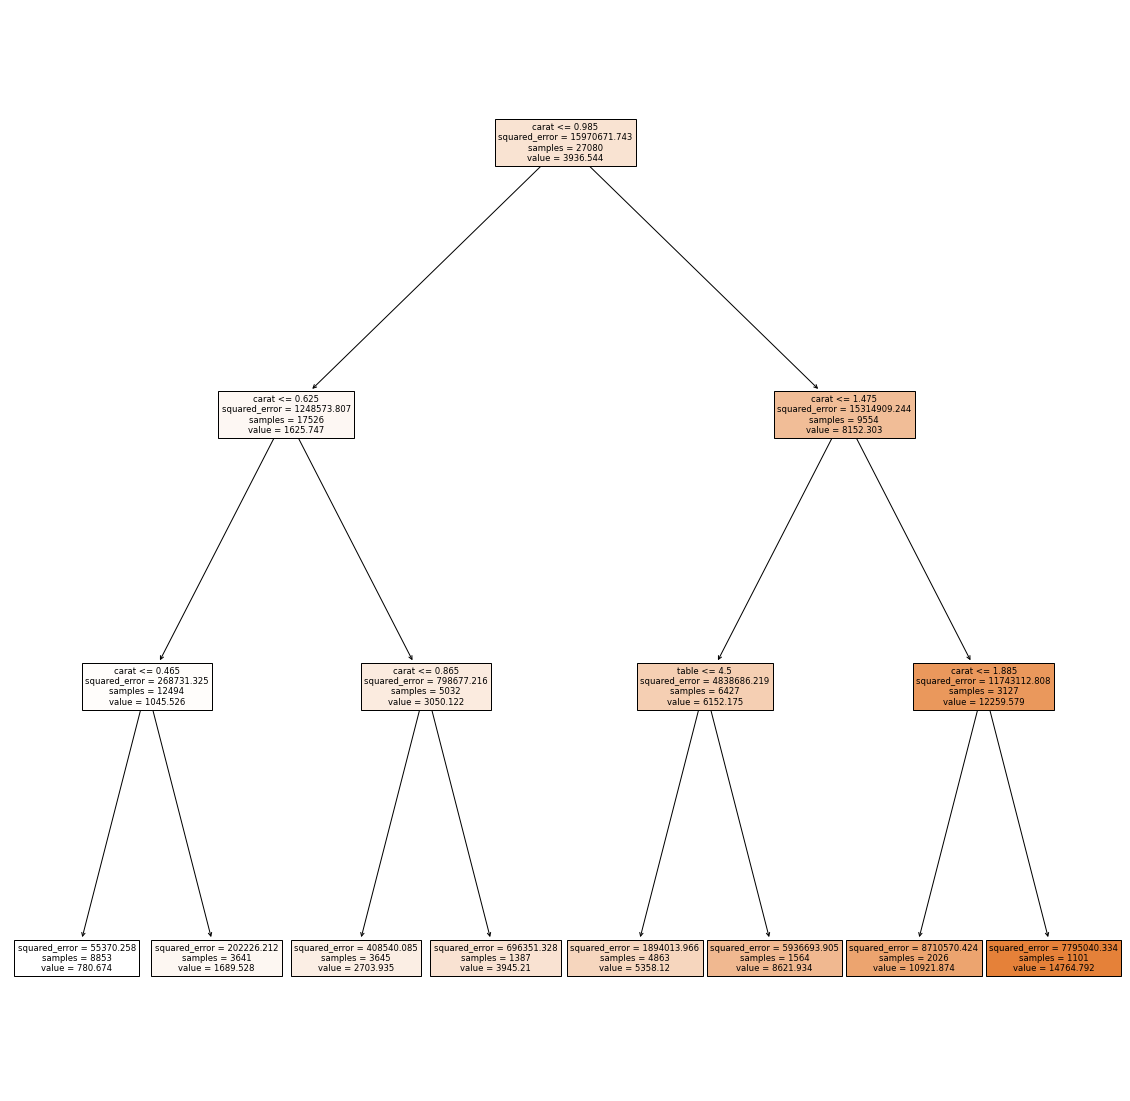

In [65]:
plt.figure(figsize=(20,20))

_ = tree.plot_tree(clf_3.estimators_[0], feature_names=df.columns, filled=True)


In [66]:
dtreeviz(clf_3)

ValueError: Tree model must be in (DecisionTreeRegressor, DecisionTreeClassifier, xgboost.core.Booster, lightgbm.basic.Booster, pyspark DecisionTreeClassificationModel or pyspark DecisionTreeClassificationModel) but you passed a RandomForestRegressor!

#### Metrics for base model

In [68]:
clf = RandomForestRegressor(random_state=1)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [69]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [70]:
from sklearn.metrics import mean_absolute_percentage_error

print('Metrics for Random Forest base model\n')

# rmse
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE:',100*max(0,round(rmse,2))) 

# mape
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {round(mape, 5)}')

# R2
R2 = clf.score(X_test, y_test)
print(f'R2: {round(R2, 5)}')




Metrics for Random Forest base model

RMSE: 52325.0
MAPE: 0.08219
R2: 0.98204


#### Hyperparameter tuning of Random Forest Regressor

In [79]:
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(
                                start = 1, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x rmsein np.linspace(3, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [3, 13, 24, 35, 45, 56, 67, 77, 88, 99, 110, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000]}


In [59]:
from sklearn.model_selection import RandomizedSearchCV

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid,
                               n_iter = 200, cv = 5, verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

NameError: name 'clf' is not defined

In [1]:
rf_random

NameError: name 'rf_random' is not defined

#### Using tensorflow

In [53]:
from IPython.core.magic import register_line_magic

def set_cell_height(size):
  ipy_display(
      Javascript("google.colab.output.setIframeHeight(0, true, {maxHeight: " +
                 str(size) + "})"))

In [55]:
set_cell_height(300)

NameError: name 'ipy_display' is not defined

In [50]:
def split_dataset(dataset, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

In [51]:
import tensorflow_decision_forests as tfdf

# Split the dataset into a training and testing dataset.
train_ds_pd, test_ds_pd = split_dataset(df)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

# Name of the label column.
label = "price"

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task=tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task=tfdf.keras.Task.REGRESSION)

37786 examples in training, 16008 examples for testing.


####

In [52]:
%set_cell_height 300

# Configure the model.
model_7 = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)

# Train the model.
model_7.fit(x=train_ds)

UsageError: Line magic function `%set_cell_height` not found.


In [30]:
%set_cell_height 300

# Evaluate the model on the test dataset.
model_7.compile(metrics=["mse"])
evaluation = model_7.evaluate(test_ds, return_dict=True)

print(evaluation)
print()
print(f"MSE: {evaluation['mse']}")
print(f"RMSE: {np.sqrt(evaluation['mse'])}")

38/38 [==============================] - 10s 216ms/step - loss: 0.0000e+00 - mse: 156028.9688
{'loss': 0.0, 'mse': 156028.96875}

MSE: 156028.96875
RMSE: 395.0050237022309


In [42]:
model_7.summary()


Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: REGRESSION
Label: "__LABEL"

Input Features (9):
	carat
	clarity
	color
	cut
	depth
	table
	x
	y
	z

No weights

Variable Importance: MEAN_MIN_DEPTH:
    1. "__LABEL" 13.381699 ################
    2.   "table" 12.070625 ##############
    3.   "depth" 11.435983 #############
    4.     "cut" 10.178461 ###########
    5.       "z"  8.311505 ########
    6.   "color"  5.519433 ####
    7.       "x"  4.732963 ###
    8. "clarity"  4.277718 ##
    9.       "y"  3.024076 
   10.   "carat"  2.405874 

Variable Importance: NUM_AS_ROOT:
    1.   "carat" 124.000000 ################
    2.       "y" 79.000000 ##########
    3.       "x" 65.000000 ########
    4.       "z" 19.000000 ##


In [44]:
from wurlitzer import pipes

with open("plot.html", "w") as f:
    f.write(
        tfdf.model_plotter.plot_model(model_7)
        )

# 10.0. Referências

[Scikit Learn LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)<br>
[Scikit Learn RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)<br>
[Kaggle Diamond Pricing Modelling](https://www.kaggle.com/code/tobby1177/diamond-price-modelling/notebook)<br>
[Scikit Yellowbrick Residuals](https://www.scikit-yb.org/en/latest/api/regressor/residuals.html)<br>
[Scikit Yellowbrick Prediction Error Plot](https://www.scikit-yb.org/en/latest/api/regressor/peplot.html)
[Visualizing Linear Ridge and Lasso Regression Performance](https://towardsdatascience.com/visualizing-linear-ridge-and-lasso-regression-performance-6dda7affa251)<br>
[Lasso Regression Plot](https://h1ros.github.io/posts/lasso-regression/)<br>
[Hyperparameter Tuning for Random Forest using scikit-learn](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)<br>
[Ensamble hyperparameters](https://inria.github.io/scikit-learn-mooc/python_scripts/ensemble_hyperparameters.html)<br>
[Ensamble RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)